In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import display
%matplotlib inline

# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
# Scalars
from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
# Features
from sklearn.feature_selection import VarianceThreshold, SelectKBest

# Models
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN

# required for importin modules from other directories
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from common import misc
from common.data_parser import *
from common.model_trainer import *
from common.misc import *
from config import *
from heart_helpers import *

plt.style.use("seaborn")

In [2]:
df_raw = parse_heart_disease("big")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [3]:
df = process_heart(df_raw, impute_mode=2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
x, y = df[HEART_FEATS], df[HEART_TARGET]
x.head(), y.head()

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   1       145   233    1        2      150      0      2.3      3   
 1   67    1   4       160   286    0        2      108      1      1.5      2   
 2   67    1   4       120   229    0        2      129      1      2.6      2   
 3   37    1   3       130   250    0        0      187      0      3.5      3   
 4   41    0   2       130   204    0        2      172      0      1.4      1   
 
    ca  thal  
 0   0     3  
 1   3     0  
 2   2     2  
 3   0     0  
 4   0     0  ,
 0    0
 1    2
 2    1
 3    0
 4    0
 Name: target, dtype: int64)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# RFC
params = {
    "n_estimators": [1, 10, 20, 100, 200, 500, 1000],
    "criterion": ["gini", "entropy"],
    "max_features": ["sqrt", "log2"]
}


modeltrainer = ModelTrainer(RFC, params, x_train, y_train, x_test, y_test, accuracy_score, thread_cnt=4)
modeltrainer.cm_setup([0, 1, 2, 3, 4])
modeltrainer.train()
modeltrainer.save_result("out/rf.csv")

cms = modeltrainer.cms

df_results = modeltrainer.result

Finished evaluation
Best parameteters found with: {'n_estimators': 10, 'criterion': 'gini', 'max_features': 'log2', 'id': 5}
score= 0.5901639344262295
Total evaluation time = 6.68s


# 61


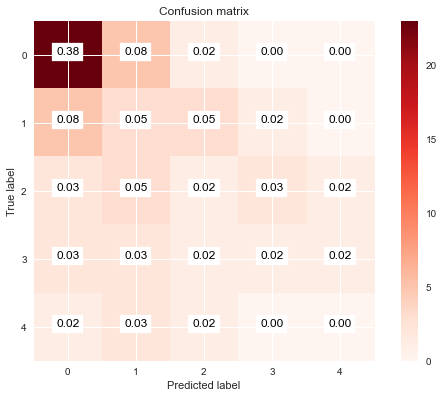

In [7]:
modeltrainer.plot_confusion_matrix(0);

# 61


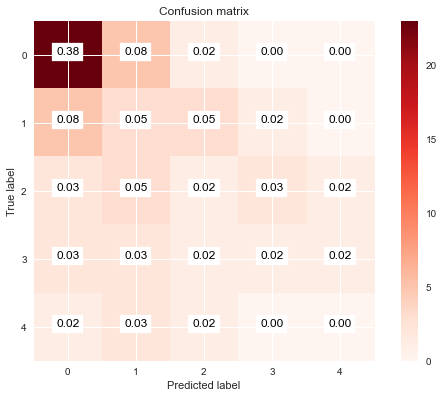

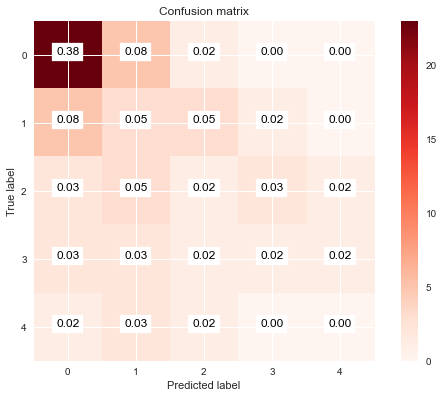

In [8]:
plot_confusion_matrix(cms[0][1], [0, 1, 2, 3, 4], normalize=True, title="Confusion matrix", cmap=plt.cm.Reds)

In [7]:
df_results

,n_estimators,criterion,max_features,score,id
0,1,gini,sqrt,0.557377,0
1,1,gini,log2,0.557377,1
2,1,entropy,sqrt,0.573770,2
3,1,entropy,log2,0.475410,3
4,10,gini,sqrt,0.524590,4
5,10,gini,log2,0.557377,5
6,10,entropy,sqrt,0.557377,6
7,10,entropy,log2,0.491803,7
8,20,gini,sqrt,0.524590,8
9,20,gini,log2,0.524590,9


In [24]:
# KNN
params = {
    "n_neighbors" : list(range(1, 20)), 
    "weights" : ["uniform", "distance"],
    "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]
    }


modeltrainer = ModelTrainer(KNN, params, x_train, y_train, x_test, y_test, accuracy_score, thread_cnt=4)
modeltrainer.train()
modeltrainer.save_result("out/knn.csv")

df_results = modeltrainer.result

Finished evaluation
Best parameteters found with: {'n_neighbors': 16, 'weights': 'distance', 'algorithm': 'auto'}
score= 0.5573770491803278
Total evaluation time = 1.34s


In [ ]:
gini = df_results.loc[(df_results['criterion'] == "gini")]
entropy = df_results.loc[(df_results['criterion'] == "entropy")]

plt.style.use('seaborn')
plt.plot(gini["n_estimators"], gini["score"], label="gini")
plt.plot(entropy["n_estimators"], entropy["score"], label="entropy")
plt.legend()
plt.title(title)
plt.ylim(-1.5, 1.5)
plt.savefig("out/" + fileName)
plt.show()